In [ ]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

print(__version__)  # need 1.9.0 or greater
init_notebook_mode(connected=True)

5.15.0


In [ ]:
def plotly_df(df, title="", width=800, height=500):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode="lines")
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = go.Layout(title=title, width=width, height=height)
    fig = go.Figure(data=data, layout=layout)
    fig.show(renderer='colab')

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
df = pd.read_csv(DATA_PATH + "wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [ ]:
df.shape

(383, 7)

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
plotly_df(df=df.set_index("date")[["count"]], title="assn9_plot")

In [ ]:
from prophet import Prophet

In [ ]:
predictions = 30
df = df[["date", "count"]]
df.columns = ["ds", "y"]

In [ ]:
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [ ]:
pr = Prophet()

In [ ]:
train_df = df[:-predictions].copy()
pr.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsoalygac/mpz8s4w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsoalygac/gcnarkv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62258', 'data', 'file=/tmp/tmpsoalygac/mpz8s4w_.json', 'init=/tmp/tmpsoalygac/gcnarkv4.json', 'output', 'file=/tmp/tmpsoalygac/prophet_modelzdc9r1oo/prophet_model-20240723045357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = pr.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [ ]:
forecast = pr.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2974.978572,1718.407804,2516.852952,2952.866018,2995.906510,-861.672644,-861.672644,-861.672644,-861.672644,-861.672644,-861.672644,0.0,0.0,0.0,2113.305928
379,2016-01-17,2980.317007,1828.812559,2648.572626,2956.502470,3002.555813,-720.693920,-720.693920,-720.693920,-720.693920,-720.693920,-720.693920,0.0,0.0,0.0,2259.623088
380,2016-01-18,2985.655442,2867.609010,3706.863313,2960.721841,3009.108599,281.401813,281.401813,281.401813,281.401813,281.401813,281.401813,0.0,0.0,0.0,3267.057256
381,2016-01-19,2990.993878,3122.774975,3950.368555,2964.858708,3016.041821,541.384817,541.384817,541.384817,541.384817,541.384817,541.384817,0.0,0.0,0.0,3532.378695
382,2016-01-20,2996.332313,3039.718256,3860.355233,2969.192430,3022.585150,425.485568,425.485568,425.485568,425.485568,425.485568,425.485568,0.0,0.0,0.0,3421.817881


#Q1. What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.



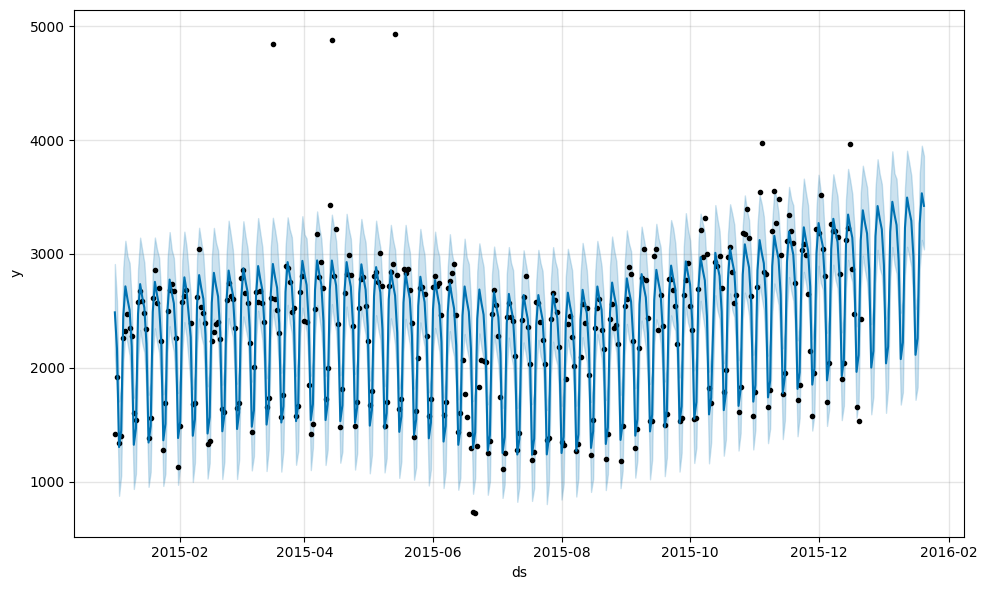

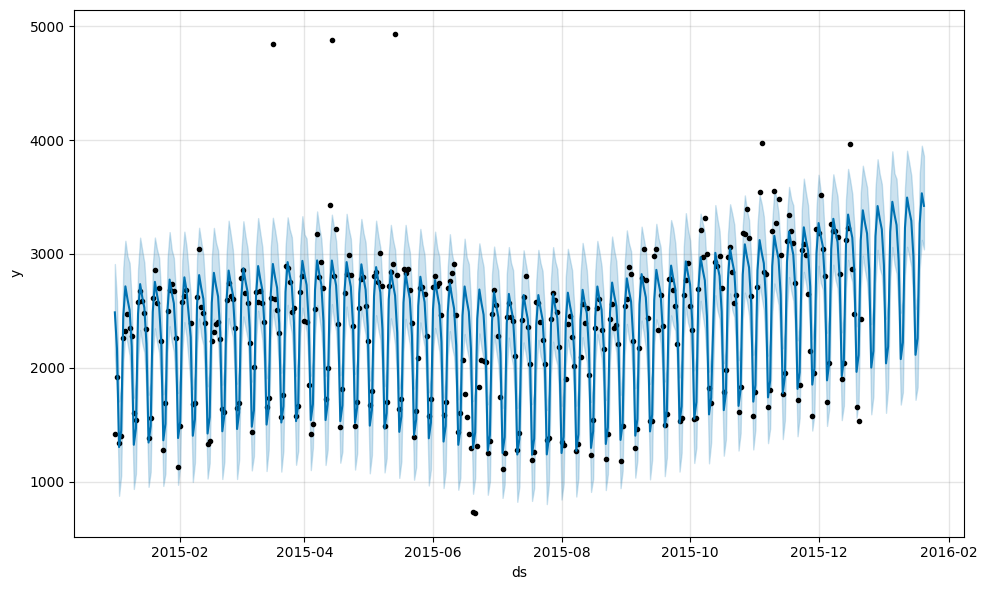

In [ ]:
pr.plot(forecast)

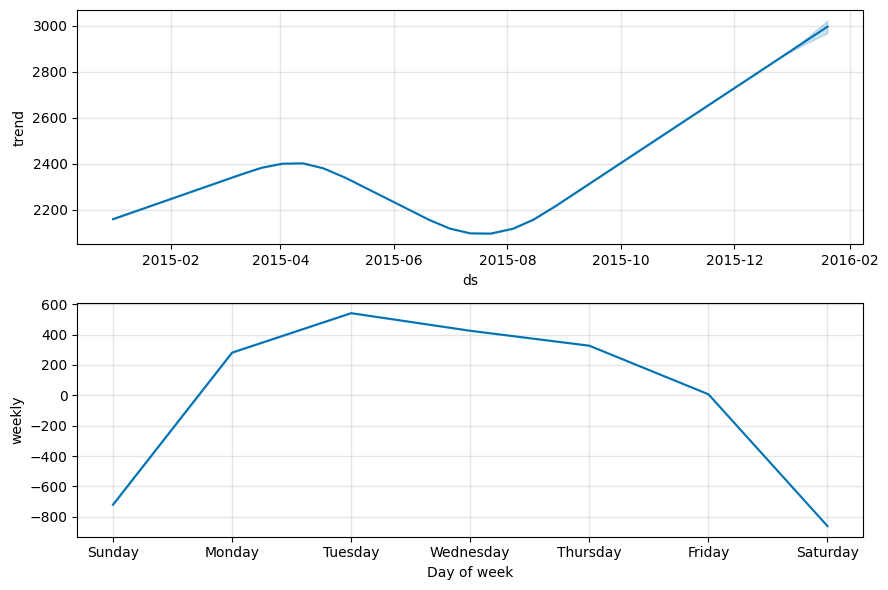

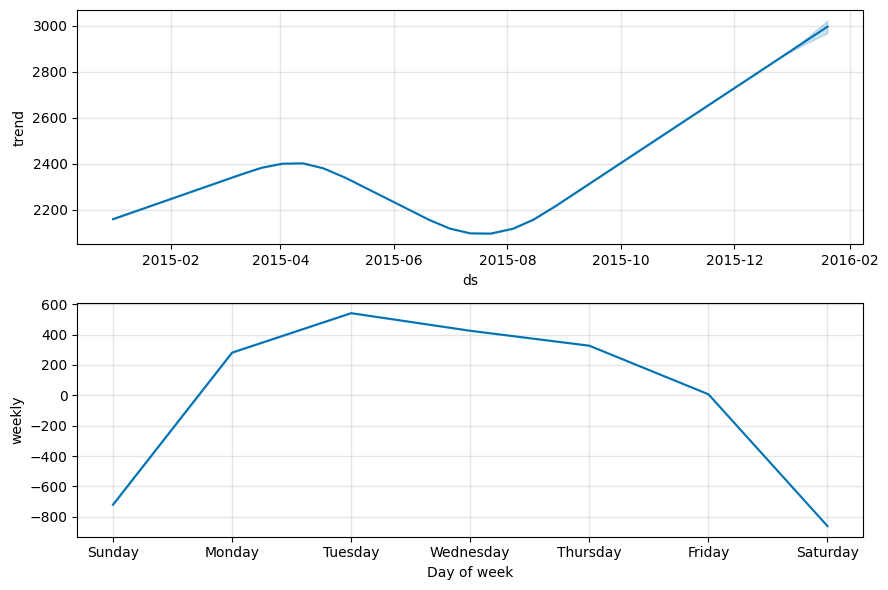

In [ ]:
pr.plot_components(forecast)

In [ ]:
cmp_df = forecast.set_index("ds")[["yhat", "yhat_upper", "yhat_lower"]].join(df.set_index("ds"))

In [ ]:
cmp_df["e"] = cmp_df["y"] - cmp_df["yhat"]
cmp_df["p"] = cmp_df["e"] / cmp_df["y"] * 100
print("MAPE: ", round(np.mean(abs(cmp_df[-predictions:]["p"])), 2))
print("MAE: ", round(np.mean(abs(cmp_df[-predictions:]["e"])), 2))

MAPE:  34.35
MAE:  596.53


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

#Q4

Dickey-Fuller test: p=0.107392


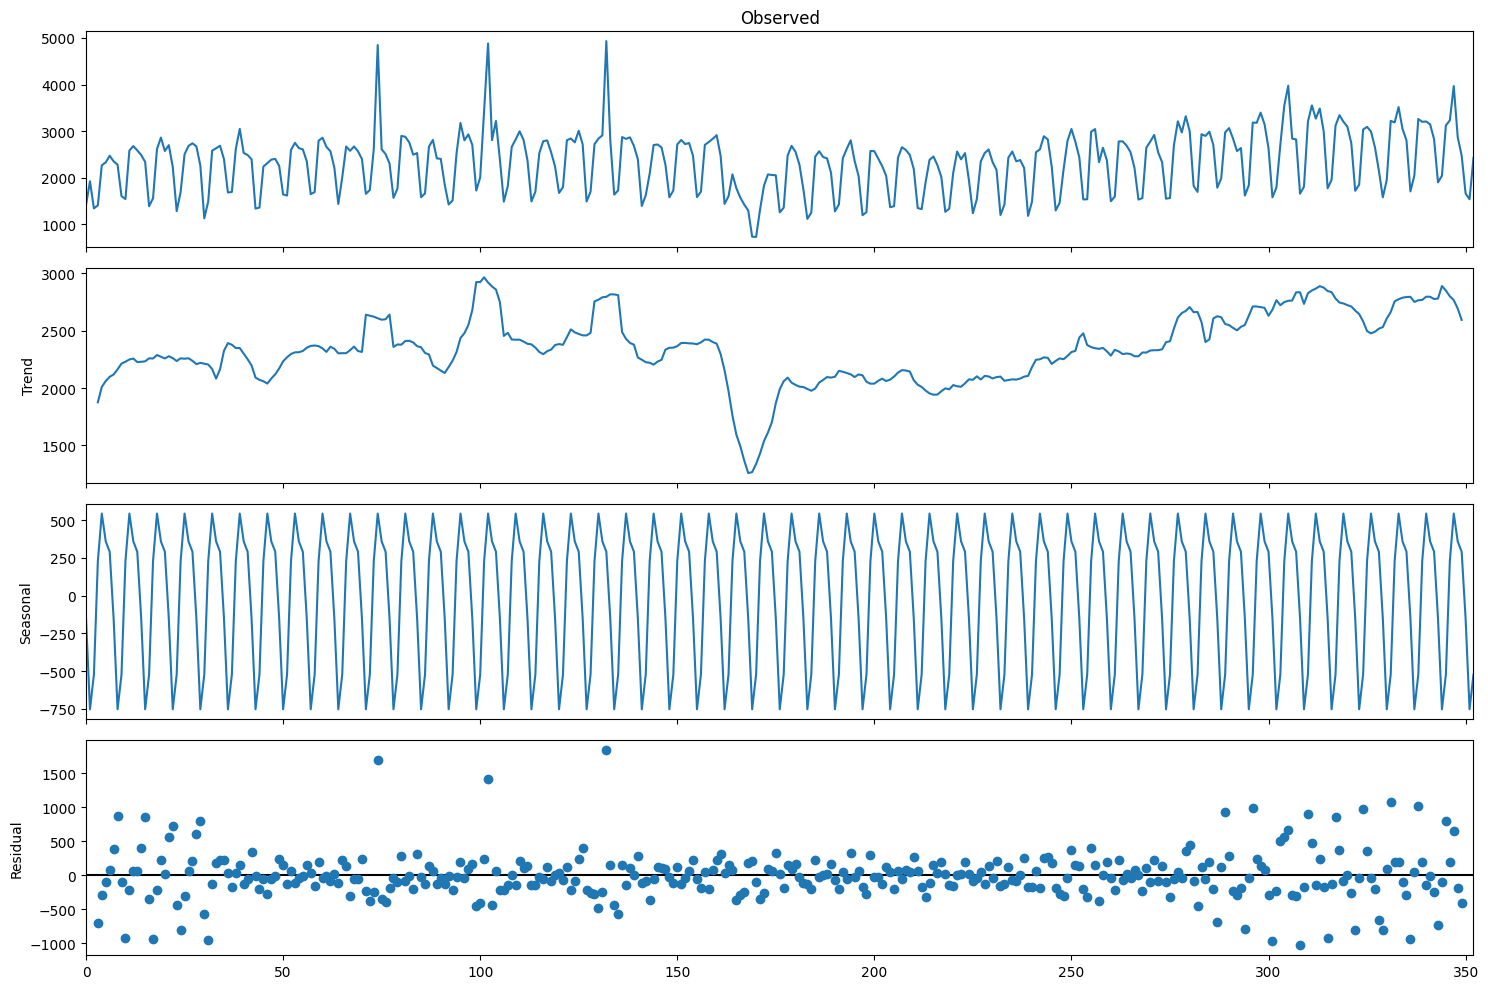

In [ ]:
sm.tsa.seasonal_decompose(train_df['y'].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df["y"])[1])

In [ ]:
train_df.set_index("ds", inplace=True)

Dickey-Fuller test: p=0.000000


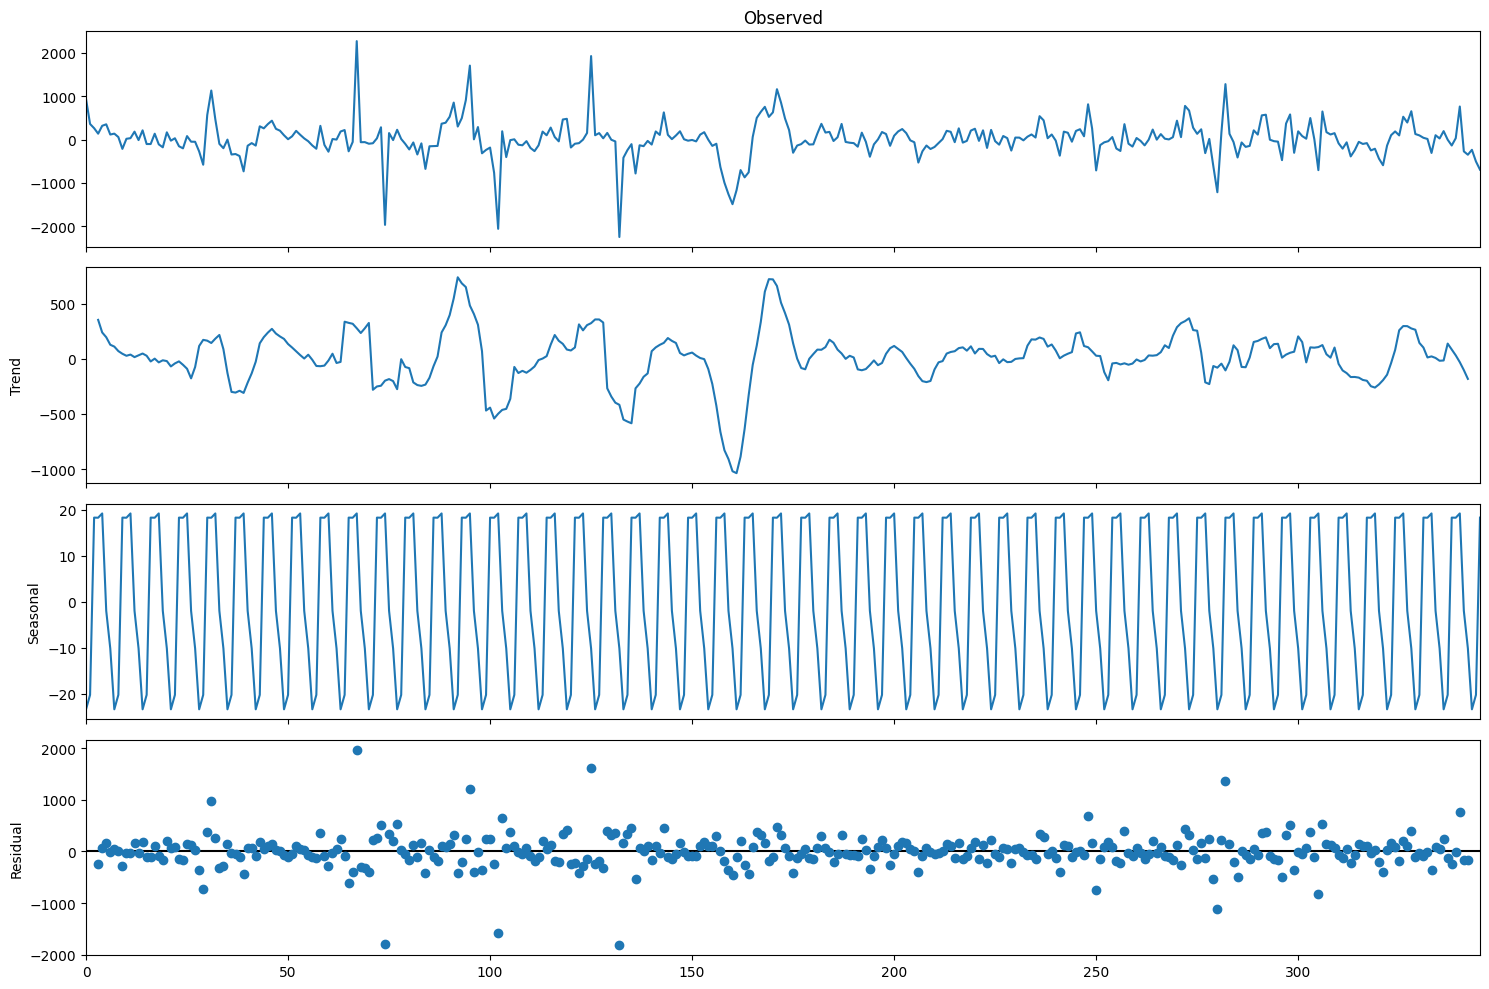

In [ ]:
train_df["y_diff"] = train_df.y - train_df.y.shift(7)
sm.tsa.seasonal_decompose(train_df["y_diff"][7:].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[8:])[1])

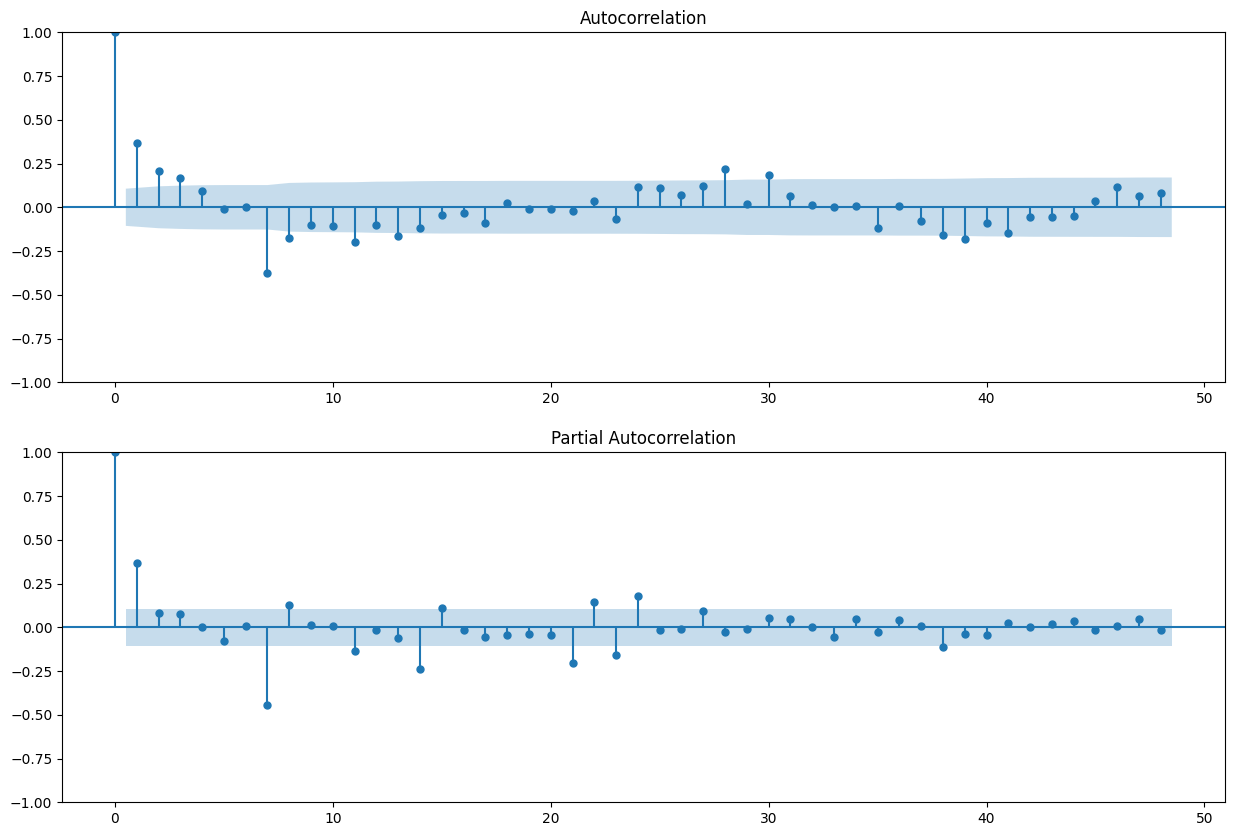

In [ ]:
ax = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

In [ ]:
ps = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Qs = range(0, 2)
ds = range(0, 2)
Ds = range(0, 3)

In [ ]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [ ]:
import warnings

from tqdm.notebook import tqdm

results1 = []
best_aic = float("inf")
warnings.filterwarnings("ignore")

for param in tqdm(parameters_list):
  try:
    model = sm.tsa.statespace.SARIMAX(train_df["y"], order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], 7),).fit(disp=-1)
  except (ValueError, np.linalg.LinAlgError):
    continue

  aic = model.aic
  if aic < best_aic:
    best_model = model
    best_aic = aic
    best_param = param

  results1.append([param, model.aic])

  0%|          | 0/384 [00:00<?, ?it/s]

In [ ]:
result_table1 = pd.DataFrame(results1, columns=["parameters", "aic"])
print(result_table1.sort_values(by="aic", ascending=True).head())

             parameters         aic
42   (0, 0, 1, 3, 0, 0)   10.000000
43   (0, 0, 1, 3, 0, 1)   12.000000
83   (0, 0, 3, 2, 0, 0)   12.000000
236  (1, 0, 1, 3, 2, 1)   14.000000
88   (0, 0, 3, 3, 0, 1)  366.368054


In [ ]:
result_table1[
    result_table1["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
355,"(1, 1, 2, 3, 2, 1)",4988.976028
353,"(1, 1, 2, 3, 1, 1)",5019.555903
257,"(1, 0, 2, 3, 1, 0)",5022.312524
255,"(1, 0, 2, 3, 0, 0)",5174.151111


In [ ]:
import scipy.stats

train_df["y_box"], lmbda = scipy.stats.boxcox(train_df["y"])
print("The optimal Box-Cox transformation parameter: %f" %lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [ ]:
results2 = []
best_aic = float("inf")
warnings.filterwarnings("ignore")

for param in tqdm(parameters_list):
  try:
    model = sm.tsa.statespace.SARIMAX(train_df["y_box"], order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], 7), enforce_stationary=False, enforce_invertibility=False).fit(disp=-1)
  except (ValueError, np.linalg.LinAlgError):
    continue

  aic = model.aic
  if aic < best_aic:
    best_model = model
    best_aic = aic
    best_param = param

  results2.append([param, model.aic])

  0%|          | 0/384 [00:00<?, ?it/s]

In [ ]:
result_table2 = pd.DataFrame(results2, columns=["parameters", "aic"])
print(result_table2.sort_values(by="aic", ascending=True).head())

             parameters          aic
257  (1, 0, 2, 3, 0, 1)    16.000000
41   (0, 0, 1, 3, 0, 0)   101.753969
261  (1, 0, 2, 3, 2, 1)  3528.511392
284  (1, 0, 3, 3, 2, 1)  3529.820329
213  (1, 0, 0, 3, 2, 1)  3530.231534


In [ ]:
result_table2[result_table2["parameters"].isin([(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)])].sort_values(by="aic")

,parameters,aic
258,"(1, 0, 2, 3, 1, 0)",3556.880030
354,"(1, 1, 2, 3, 1, 1)",3558.126722
356,"(1, 1, 2, 3, 2, 1)",3559.099504
256,"(1, 0, 2, 3, 0, 0)",3674.914363


In [ ]:
best_model = sm.tsa.statespace.SARIMAX(
    train_df["y_box"],
    order=(1, 0, 2),
    seasonal_order=(3, 2, 1, 7),
    enforce_stationary=False,
    enforce_invertibility=False
).fit(disp=-1)

In [ ]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 2, [1], 7)   Log Likelihood               -2309.750
Date:                             Tue, 23 Jul 2024   AIC                           4635.499
Time:                                     06:20:29   BIC                           4665.571
Sample:                                          0   HQIC                          4647.511
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8629      0.057     15.198      0.000       0.752       0.974
ma.L1         -0.4143      

Student's test: p=0.118541
Dickey-Fuller test: p=0.000000


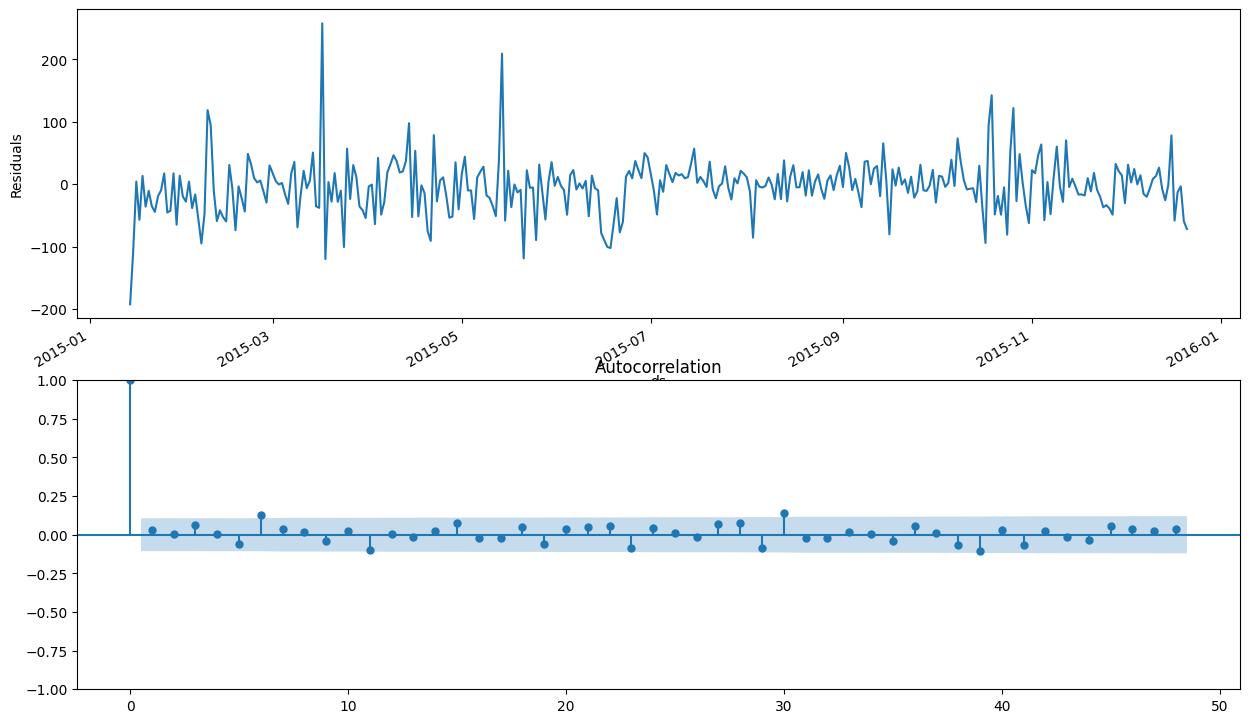

In [ ]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u"Residuals")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [ ]:
def invboxcox(y, lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lmbda * y + 1) / lmbda)

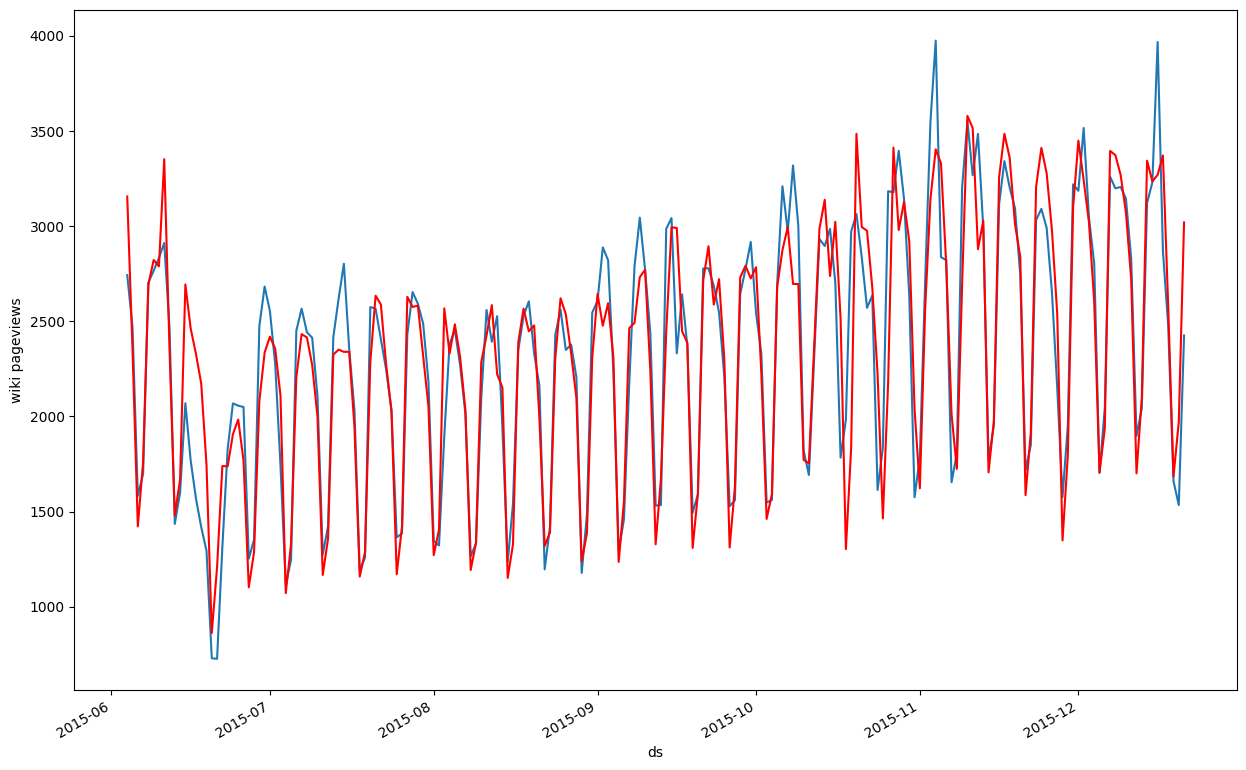

In [ ]:
train_df["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color="r")
plt.ylabel("wiki pageviews");